In [1]:
## import statements

from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import scanpy
import pandas
from typing import Tuple, Any, List, Union
import numpy as np
import torch
import os
from anndata import read_h5ad
from scanpy import pp
import pandas as pd
import scanpy as sc
from scipy import sparse
import anndata as Anndata
import random



# tissuemosaic import
import tissuemosaic as tp

In [2]:
from tissuemosaic.utils import *
from tissuemosaic.plots import *
from tissuemosaic.plots.plot_misc import *
from tissuemosaic.models.patch_analyzer import SpatialAutocorrelation, Composition
from tissuemosaic.data.dataset import MetadataCropperDataset
from tissuemosaic.genex.gene_utils import *

[neptune] [warning] NeptuneDeprecationWarning: You're importing the Neptune client library via the deprecated `neptune.new` module, which will be removed in a future release. Import directly from `neptune` instead.


In [3]:
## Make plots directory if it doesn't already exist
try:
    os.mkdir("./plots")
except:
    pass

### Plotting

In [4]:
## plotting parameters

linewidth = 5
tickfontsize = 80
labelfontsize = 80
labelpad = 40
titlefontsize=80
legendfontsize=80

In [5]:
## Plotting functions

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

# assign color to cell type
cdict = {
    'ES': colors[0],
    'RS': colors[1],
    'Myoid': colors[2],
    'SPC': colors[3],
    'SPG': colors[4],
    'Sertoli': colors[5],
    'Leydig': colors[6],
    'Endothelial': colors[7],
    'Macrophage': colors[8]
}


### Generate 2G

#### Before purification

In [6]:
wt_dir = os.path.abspath("../TissueMosaic_output/testis/gr_conditional_motif_enrichment_testis/wt_small_patch")
db_dir = os.path.abspath("../TissueMosaic_output/testis/gr_conditional_motif_enrichment_testis/db_small_patch")

In [7]:
cell_types = ["ES"]
import pickle

for i,ctype in enumerate(cell_types):
    out_prefix = "dino_filter_2.0_ctype"
    rel_q_gk_outfile_name = out_prefix + '_' + ctype + f"_df_rel_q_gk_ssl.pickle"
    
    wt_rel_q_gk_outfile = os.path.join(wt_dir, rel_q_gk_outfile_name)
    wt_rel_q_gk = pickle.load(open(wt_rel_q_gk_outfile, 'rb'))
    
    wt_rel_q_gk = wt_rel_q_gk[wt_rel_q_gk < 0] 
    
    db_rel_q_gk_outfile = os.path.join(db_dir, rel_q_gk_outfile_name)
    db_rel_q_gk = pickle.load(open(db_rel_q_gk_outfile, 'rb'))
    
    db_rel_q_gk = db_rel_q_gk[db_rel_q_gk < 0] 
    
#     print(wt_rel_q_gk.sort_values(by=0).head(n=20))
    
#     print(db_rel_q_gk.sort_values(by=0).head(n=20))
    
    higher_si_in_wt = wt_rel_q_gk.sub(db_rel_q_gk, fill_value=0).dropna()
    higher_si_in_db = db_rel_q_gk.sub(wt_rel_q_gk, fill_value=0).dropna()
    
    print(higher_si_in_db.sort_values(by=0).head(n=10))
    print(higher_si_in_wt.sort_values(by=0).head(n=10))

                      0
Tnp2          -0.079599
Tnp1          -0.060127
Prm1          -0.053491
1700001P01Rik -0.048641
Mycbp         -0.041268
Prm2          -0.034831
Hmgb4         -0.024356
Gstm5         -0.022877
Arf4          -0.018568
Gsg1          -0.018467
                      0
Rhbdd1        -0.062517
Prss51        -0.058204
Wbp2nl        -0.056404
1700125H03Rik -0.050799
Rasa3         -0.048983
Cxxc5         -0.048071
Fam71e2       -0.045669
Noxred1       -0.044566
Antxrl        -0.044470
Pde1c         -0.043077


#### With purification

In [8]:
distilled_wt_dir = os.path.abspath("../TissueMosaic_output/testis/gr_conditional_motif_enrichment_testis/distilled_wt_small_patch")
distilled_db_dir = os.path.abspath("../TissueMosaic_output/testis/gr_conditional_motif_enrichment_testis/distilled_db_small_patch")

In [9]:
cell_types = ["ES"]
import pickle

for i,ctype in enumerate(cell_types):
    out_prefix = "dino_filter_2.0_ctype"
    rel_q_gk_outfile_name = out_prefix + '_' + ctype + f"_df_rel_q_gk_ssl.pickle"
    
    wt_rel_q_gk_outfile = os.path.join(distilled_wt_dir, rel_q_gk_outfile_name)
    wt_rel_q_gk = pickle.load(open(wt_rel_q_gk_outfile, 'rb'))
    
    wt_rel_q_gk = wt_rel_q_gk[wt_rel_q_gk < 0]

    
    db_rel_q_gk_outfile = os.path.join(distilled_db_dir, rel_q_gk_outfile_name)
    db_rel_q_gk = pickle.load(open(db_rel_q_gk_outfile, 'rb'))
    
    db_rel_q_gk = db_rel_q_gk[db_rel_q_gk < 0]
    
    higher_si_in_distilled_wt = wt_rel_q_gk.sub(db_rel_q_gk, fill_value=0).dropna()
    higher_si_in_distilled_db = db_rel_q_gk.sub(wt_rel_q_gk, fill_value=0).dropna()

In [10]:
print(higher_si_in_distilled_db.sort_values(by=0).head(n=10))

                      0
Tnp2          -0.250787
Prm2          -0.224094
Prm1          -0.214869
Tnp1          -0.212672
4933411K16Rik -0.158099
Smcp          -0.152080
Oaz3          -0.123185
Gapdhs        -0.117933
Reep6         -0.113745
Gsg1          -0.113064


In [11]:
print(higher_si_in_db.sort_values(by=0).loc['Smcp'])

0   -0.002468
Name: Smcp, dtype: float64


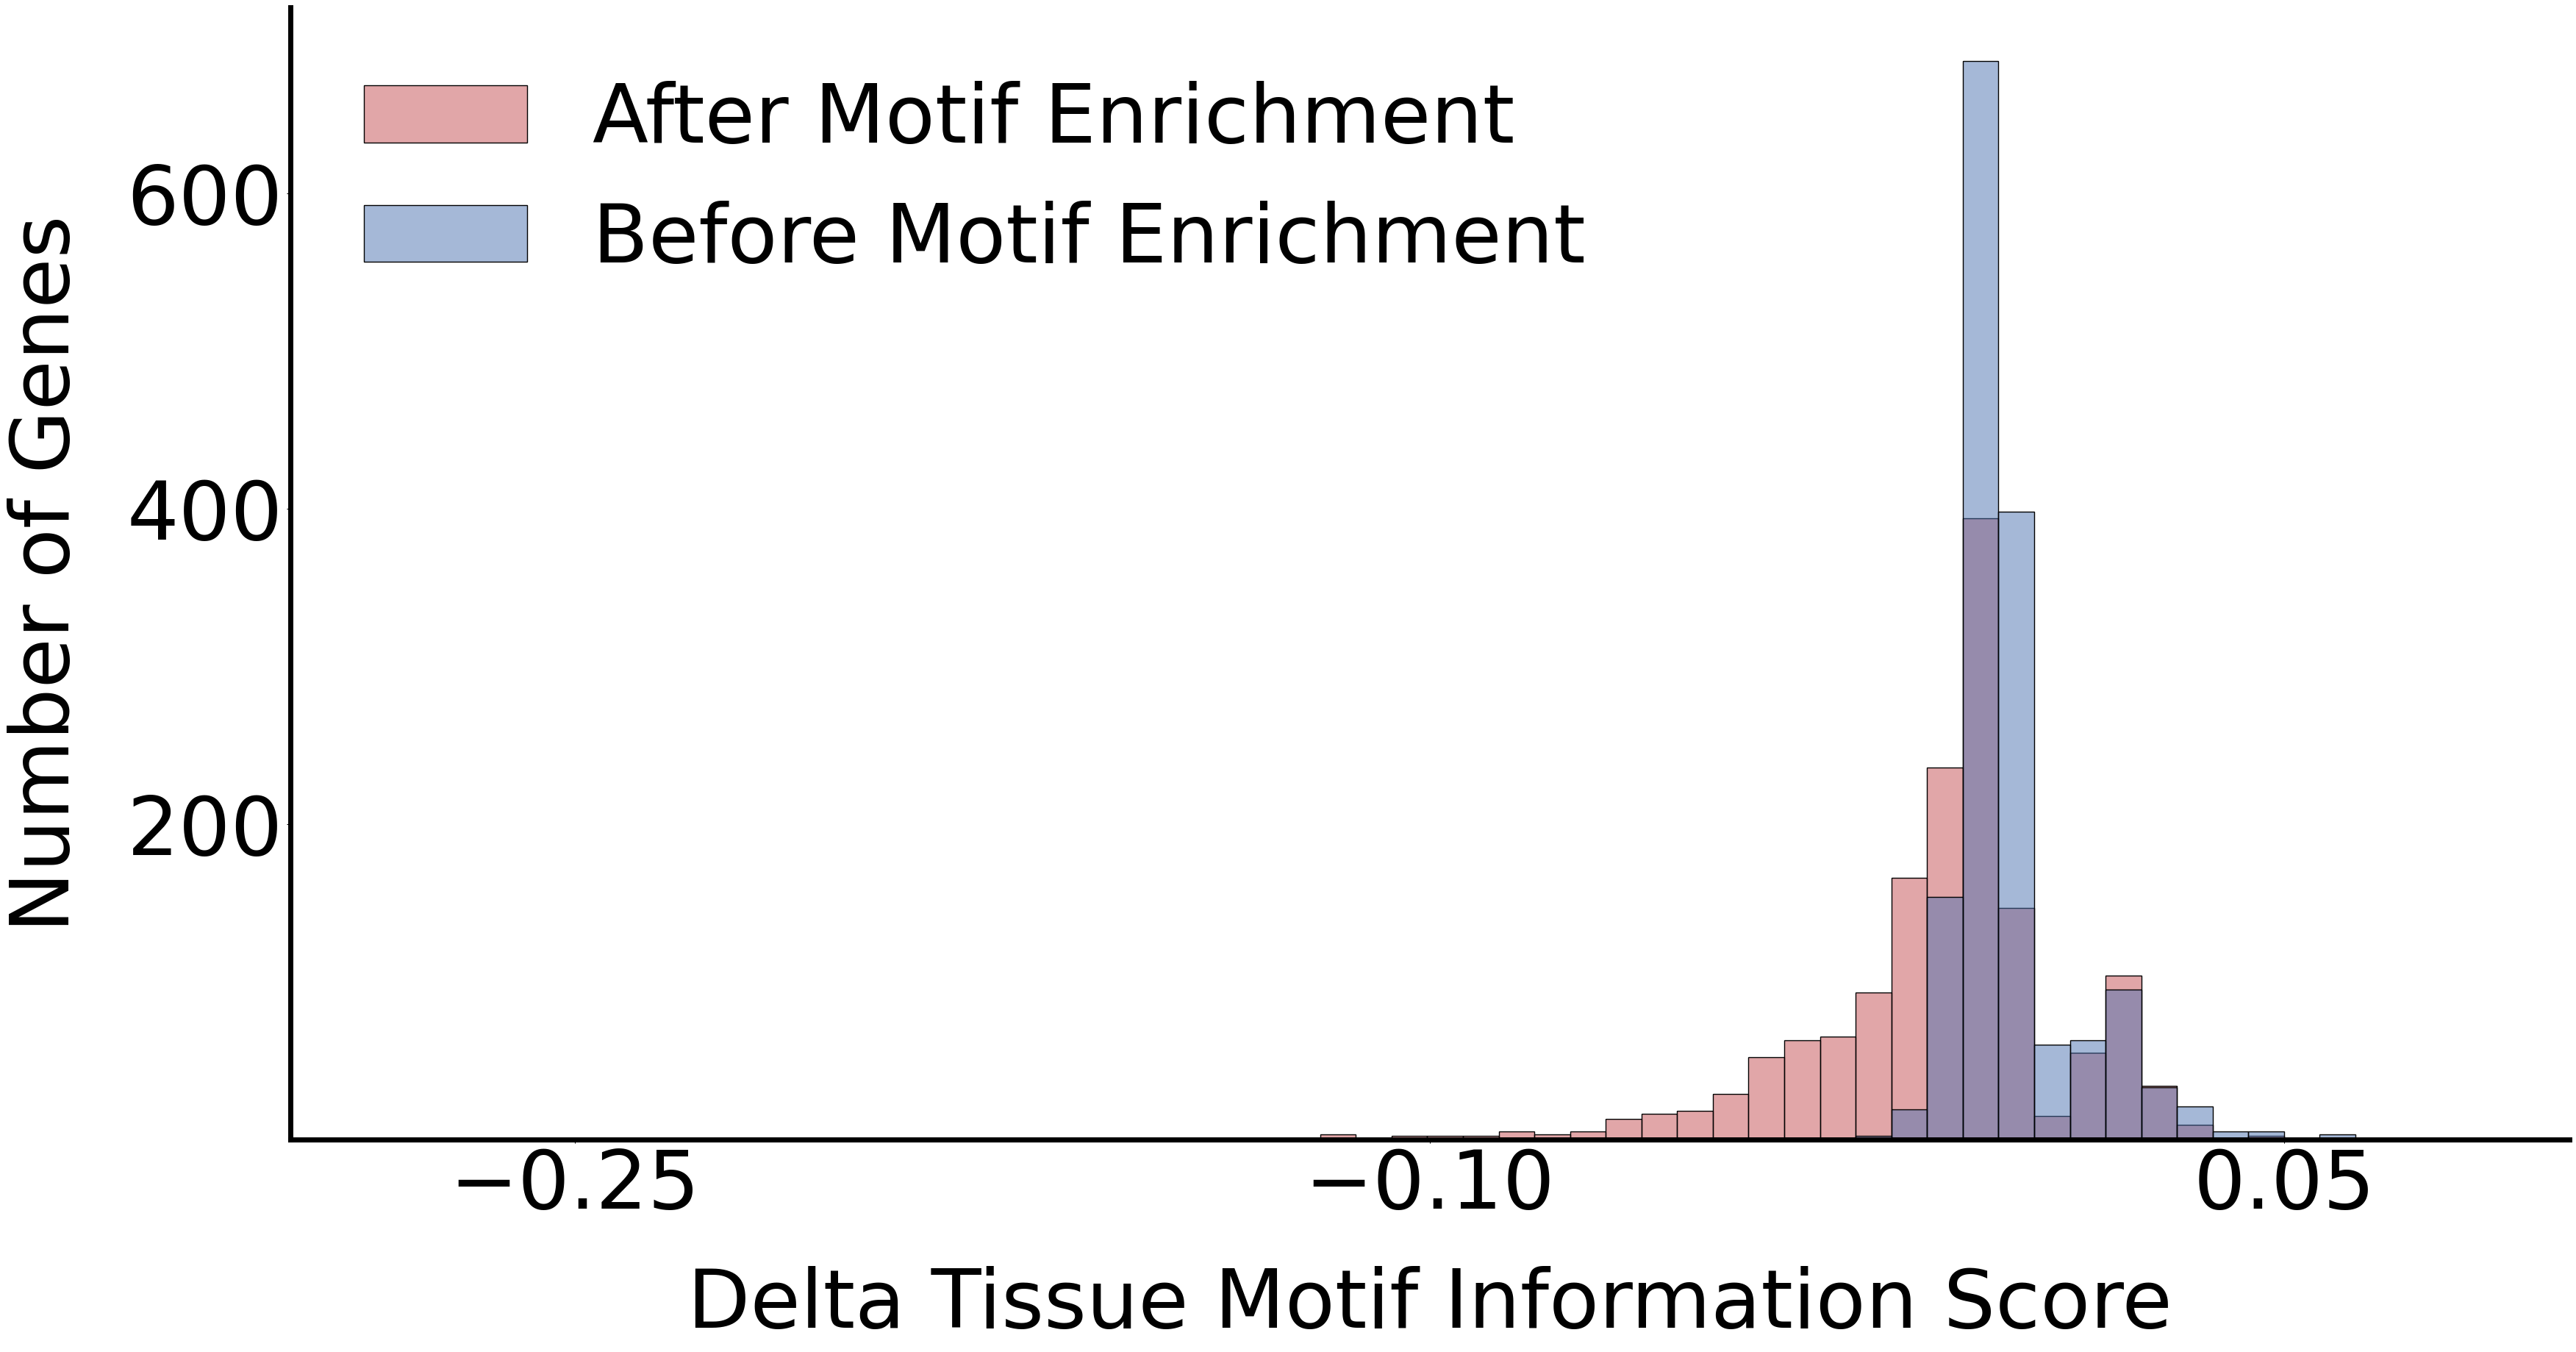

In [13]:
## try overlaying

# Create the figure and GridSpec
fig, ax = plt.subplots(figsize=(40,20))

colors = sns.color_palette("deep", 10).as_hex()
# assign color to cell type

# gs = gridspec.GridSpec(1,2)  # 1 row, 2 columns

before_after_purification = pd.concat([higher_si_in_db, higher_si_in_distilled_db], axis=1)
before_after_purification.columns = ['Before Purification', 'After Purification']
sns.histplot(before_after_purification, bins=50, legend=False,ax=ax, palette = [colors[0], colors[3]], alpha=0.5)

# ax1 = fig.add_subplot(gs[0, 0])
# sns.histplot(higher_si_in_db, bins=35, legend=False, ax=ax, color='blue')
# plt.xlabel('Delta Spatial Information Score', fontsize=labelfontsize, labelpad=labelpad)
plt.ylabel('Number of Genes', fontsize=labelfontsize, labelpad=labelpad)
plt.xlabel('Delta Tissue Motif Information Score', fontsize=labelfontsize, labelpad=labelpad)
# ax1.tick_params(axis='both', labelsize=tickfontsize)  # Adjust labelsize as needed
# ax1.set_yticks([100,200,300,400, 500, 600])
# ax1.set_title('Before Purification', fontsize=titlefontsize)
# plt.title('WT vs Diabetes Spatially Informed Genes')
plt.xlim(-0.30, 0.1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# fig.text(0.5, 0.04, 'Delta Spatial Information Score', fontsize = labelfontsize, ha='center', va='center')
# ax.spines['bottom'].set_linewidth(linewidth)
# ax.spines['left'].set_linewidth(linewidth)


# ax2 = fig.add_subplot(gs[0, 1])
# sns.histplot(higher_si_in_distilled_db,bins=35, legend=False, hue = 'orange', ax=ax)
ax.tick_params(axis='both', labelsize=tickfontsize)  # Adjust labelsize as needed
# plt.xlabel('Delta Spatial Information Score', fontsize=labelfontsize, labelpad=labelpad)
# plt.ylabel('')
# ax2.tick_params(axis='both', labelsize=tickfontsize)  # Adjust labelsize as needed
# ax2.set_yticks([100,200,300])
# plt.title('WT vs Diabetes Spatially Informed Genes')
# plt.xlim(-0.30, 0.1)
ax.set_yticks([200,400,600])
ax.set_xticks([-0.25, -0.10, 0.05])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(['After Motif Enrichment', 'Before Motif Enrichment'], fontsize=legendfontsize, frameon=False)
# ax2.set_title('After Purification', fontsize=titlefontsize)


ax.spines['bottom'].set_linewidth(linewidth)
ax.spines['left'].set_linewidth(linewidth)

fig.savefig('./plots/fig_2g.pdf',  transparent=True, dpi=600, bbox_inches='tight')


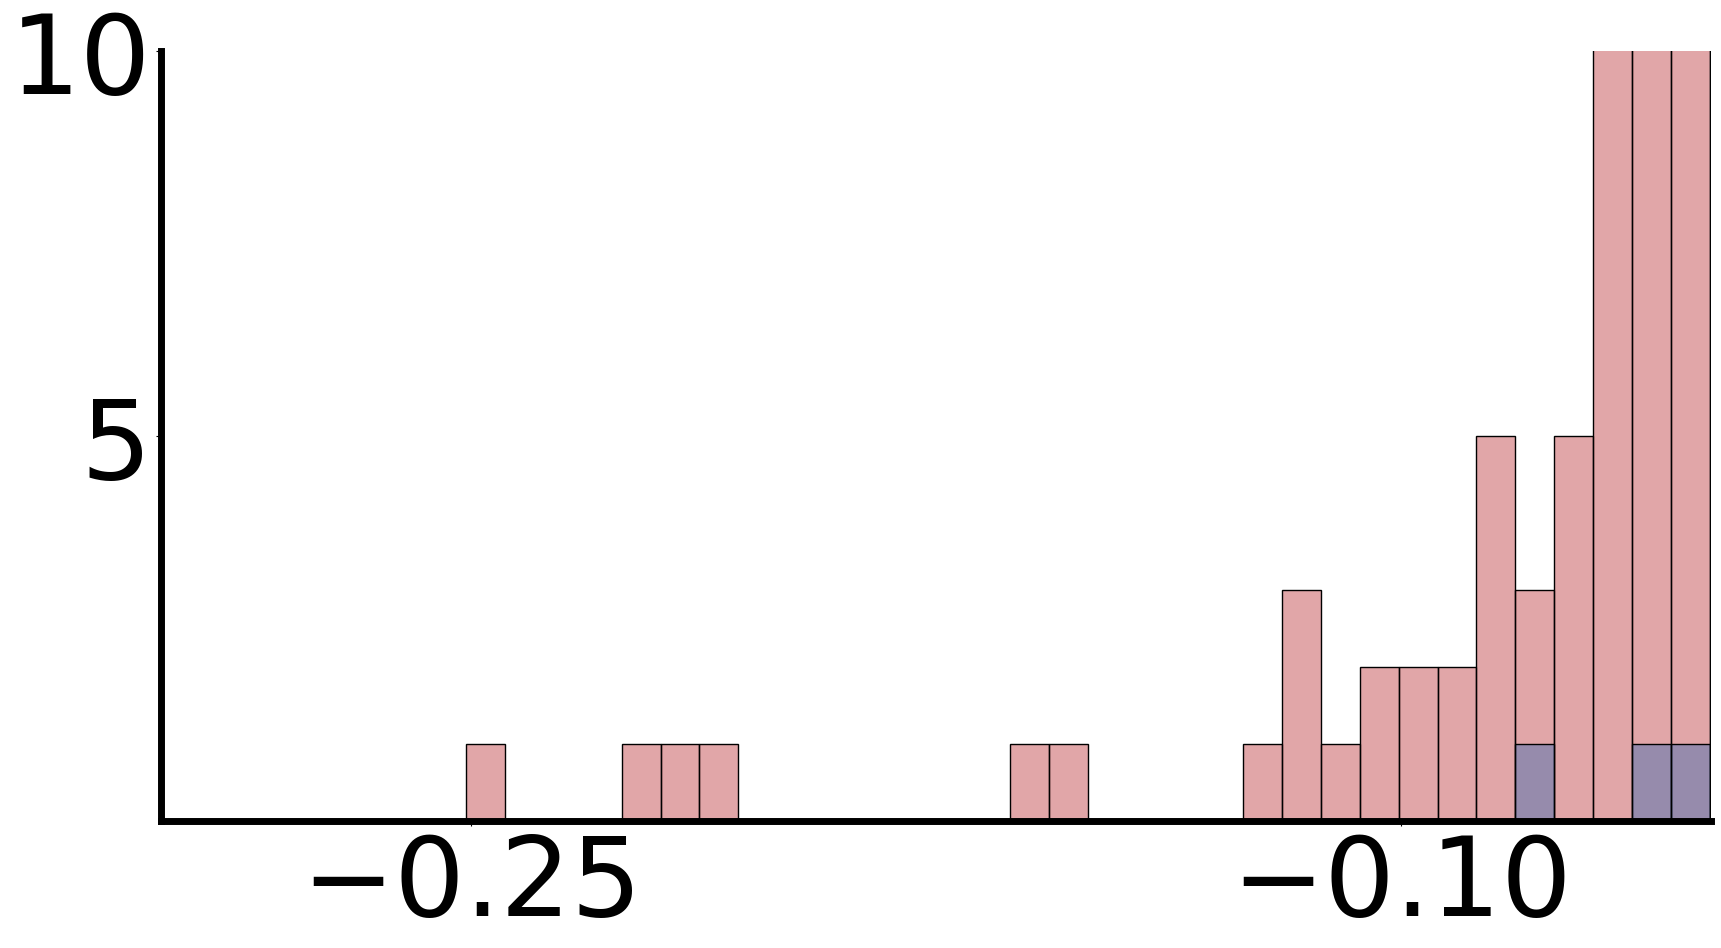

In [23]:
## try overlaying

# Create the figure and GridSpec
fig, ax = plt.subplots(figsize=(20,10))
# gs = gridspec.GridSpec(1,2)  # 1 row, 2 columns

before_after_purification = pd.concat([higher_si_in_db, higher_si_in_distilled_db], axis=1)
before_after_purification.columns = ['Before Purification', 'After Purification']
sns.histplot(before_after_purification, bins=50, legend=False,ax=ax, palette = [colors[0], colors[3]], alpha=0.5)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.tick_params(axis='both', labelsize=tickfontsize)  # Adjust labelsize as needed

plt.ylabel('')

ax.set_yticks([5, 10, 15, 20])
ax.set_xticks([-0.25, -0.10, 0.05])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlim([-0.3, -0.05])
ax.set_ylim([0, 10])
ax.spines['bottom'].set_linewidth(linewidth)
ax.spines['left'].set_linewidth(linewidth)
fig.savefig('fig_2g_inset.pdf',  transparent=True, dpi=600, bbox_inches='tight')



In [18]:
## run GSEA on the delta SI scores before purification

import gseapy as gp

pre_res = gp.prerank(rnk=higher_si_in_db, # or rnk = rnk,
                     gene_sets='/home/skambha6/chenlab/utils/m5.go.v2022.1.Mm.symbols.gmt', ## add this as parameter 
                     threads=4,
                     min_size=10,
                     max_size=1000,
                     permutation_num=100000, # reduce number to speed up testing
                     outdir=None, # don't write to disk
                     seed=6,
                     verbose=True, # see what's going on behind the scenes
                    )

pre_res.res2d.sort_values(by='FDR q-val', ascending = True, inplace=True)
# pre_res.res2d.sort_values(by='NES', ascending = False, inplace=True)
print(pre_res.res2d.head(15)[['Term', 'NES', 'NOM p-val', 'FDR q-val', 'Lead_genes']]) ## write this to out_file

from gseapy import dotplot
# to save your figure, make sure that ``ofname`` is not None

# ax = dotplot(pre_res.res2d,
#              column="FDR q-val",
#              title='SIG Testis spatial ' + ctype + ' SI score',
#              cmap=plt.cm.viridis,
#              size=6, # adjust dot size
#              figsize=(4,5), thresh=0.1, cutoff=0.1, show_ring=False,
#              ofname='SIG_si_distillation_ES_small_patch.pdf')

# pre_res.res2d.to_csv('no_purification_db_ES_small_patch.csv')

2024-06-07 12:40:05,090 [INFO] Parsing data files for GSEA.............................
2024-06-07 12:40:05,277 [INFO] 9433 gene_sets have been filtered out when max_size=1000 and min_size=10
2024-06-07 12:40:05,277 [INFO] 1127 gene_sets used for further statistical testing.....
2024-06-07 12:40:05,278 [INFO] Start to run GSEA...Might take a while..................
2024-06-07 12:43:22,533 [INFO] Congratulations. GSEApy runs successfully................



                                                 Term       NES NOM p-val  \
3                         GOCC_MALE_GERM_CELL_NUCLEUS  -1.83041  0.004859   
2                              GOBP_ACROSOME_REACTION -1.839575  0.002688   
4                          GOCC_DNA_PACKAGING_COMPLEX -1.779676  0.007697   
13     GOMF_CATION_TRANSMEMBRANE_TRANSPORTER_ACTIVITY  1.631048  0.001897   
12  GOBP_NEGATIVE_REGULATION_OF_DEVELOPMENTAL_PROCESS  1.631522  0.000899   
1                              GOCC_GERM_CELL_NUCLEUS -1.843705  0.003945   
11                                GOCC_EARLY_ENDOSOME  1.633216  0.001644   
26                          GOBP_VESICLE_LOCALIZATION  1.568453  0.006983   
27              GOBP_NEGATIVE_REGULATION_OF_SIGNALING  1.565591   0.00031   
10   GOBP_NEGATIVE_REGULATION_OF_TRANSFERASE_ACTIVITY  1.639112  0.001775   
23                             GOCC_ENDOSOME_MEMBRANE  1.575684  0.007111   
28  GOBP_REGULATION_OF_SMALL_GTPASE_MEDIATED_SIGNA...   1.56188  0.007012   

In [22]:
pre_res_filter = pre_res.res2d[pre_res.res2d['FDR q-val'] < 0.25]
print(pre_res_filter)
pre_res_filter[['Term', 'NES', 'NOM p-val', 'FDR q-val', 'Lead_genes']].to_csv('no_purification_testis_differential_tmi_ES_small_patch.csv')

       Name                                               Term        ES  \
3   prerank                        GOCC_MALE_GERM_CELL_NUCLEUS -0.661675   
2   prerank                             GOBP_ACROSOME_REACTION -0.803302   
4   prerank                         GOCC_DNA_PACKAGING_COMPLEX -0.735604   
13  prerank     GOMF_CATION_TRANSMEMBRANE_TRANSPORTER_ACTIVITY  0.729155   
12  prerank  GOBP_NEGATIVE_REGULATION_OF_DEVELOPMENTAL_PROCESS  0.689677   
1   prerank                             GOCC_GERM_CELL_NUCLEUS -0.658154   
11  prerank                                GOCC_EARLY_ENDOSOME  0.739677   
26  prerank                          GOBP_VESICLE_LOCALIZATION  0.755836   
27  prerank              GOBP_NEGATIVE_REGULATION_OF_SIGNALING  0.615105   
10  prerank   GOBP_NEGATIVE_REGULATION_OF_TRANSFERASE_ACTIVITY  0.752632   
23  prerank                             GOCC_ENDOSOME_MEMBRANE  0.757308   
28  prerank  GOBP_REGULATION_OF_SMALL_GTPASE_MEDIATED_SIGNA...  0.782885   
24  prerank 

In [19]:
# run GSEA on the delta SI scores after purification

import gseapy as gp


pre_res_distilled = gp.prerank(rnk=higher_si_in_distilled_db, # or rnk = rnk,
                     gene_sets='/home/skambha6/chenlab/utils/m5.go.v2022.1.Mm.symbols.gmt', ## add this as parameter 
                     threads=4,
                     min_size=10,
                     max_size=1000,
                     permutation_num=100000, # reduce number to speed up testing
                     outdir=None, # don't write to disk
                     seed=6,
                     verbose=True, # see what's going on behind the scenes
                    )

pre_res_distilled.res2d.sort_values(by='FDR q-val', ascending = True, inplace=True)
# pre_res_distilled.res2d.sort_values(by='NES', ascending = False, inplace=True)
print(pre_res_distilled.res2d.head(15)[['Term', 'NES', 'NOM p-val', 'FDR q-val', 'Lead_genes']]) ## write this to out_file

from gseapy import dotplot
# to save your figure, make sure that ``ofname`` is not None

# ax = dotplot(pre_res.res2d,
#              column="FDR q-val",
#              title='SIG Testis spatial ' + ctype + ' SI score',
#              cmap=plt.cm.viridis,
#              size=6, # adjust dot size
#              figsize=(4,5), thresh=0.1, cutoff=0.1, show_ring=False,
#              ofname='SIG_si_distillation_ES_small_patch.pdf')

# pre_res_distilled.res2d.to_csv('purification_db_ES_small_patch.csv')

2024-06-07 12:43:22,611 [INFO] Parsing data files for GSEA.............................
2024-06-07 12:43:22,996 [INFO] 9434 gene_sets have been filtered out when max_size=1000 and min_size=10
2024-06-07 12:43:22,997 [INFO] 1126 gene_sets used for further statistical testing.....
2024-06-07 12:43:22,997 [INFO] Start to run GSEA...Might take a while..................
2024-06-07 12:46:38,650 [INFO] Congratulations. GSEApy runs successfully................



                                                Term       NES NOM p-val  \
9                         GOCC_DNA_PACKAGING_COMPLEX -1.838856  0.000096   
12                          GOCC_PROTEIN_DNA_COMPLEX -1.824962  0.000122   
8                             GOCC_GERM_CELL_NUCLEUS -1.844986  0.000089   
6                        GOCC_MALE_GERM_CELL_NUCLEUS -1.852914  0.000056   
18                            GOBP_ACROSOME_REACTION -1.728161  0.001209   
16                               GOBP_SPERM_MOTILITY -1.737148   0.00001   
23                        GOBP_GERM_CELL_DEVELOPMENT -1.686746       0.0   
22  GOBP_CILIUM_OR_FLAGELLUM_DEPENDENT_CELL_MOTILITY -1.692879  0.000082   
21         GOBP_MULTI_MULTICELLULAR_ORGANISM_PROCESS -1.694492  0.002612   
24                           GOBP_SPERM_CAPACITATION -1.671608  0.003596   
26                    GOBP_SPERMATID_DIFFERENTIATION -1.659851   0.00001   
35                        GOBP_CELL_CELL_RECOGNITION -1.615611  0.003119   
34          

In [23]:
pre_res_distilled_filter = pre_res_distilled.res2d[pre_res_distilled.res2d['FDR q-val'] < 0.25]
print(pre_res_distilled_filter)
pre_res_distilled_filter[['Term', 'NES', 'NOM p-val', 'FDR q-val', 'Lead_genes']].to_csv('purification_testis_differential_tmi_ES_small_patch.csv')

       Name                                              Term        ES  \
9   prerank                        GOCC_DNA_PACKAGING_COMPLEX -0.878676   
12  prerank                          GOCC_PROTEIN_DNA_COMPLEX -0.889222   
8   prerank                            GOCC_GERM_CELL_NUCLEUS -0.793501   
6   prerank                       GOCC_MALE_GERM_CELL_NUCLEUS -0.803143   
18  prerank                            GOBP_ACROSOME_REACTION -0.841579   
16  prerank                               GOBP_SPERM_MOTILITY  -0.66642   
23  prerank                        GOBP_GERM_CELL_DEVELOPMENT -0.629821   
22  prerank  GOBP_CILIUM_OR_FLAGELLUM_DEPENDENT_CELL_MOTILITY -0.646804   
21  prerank         GOBP_MULTI_MULTICELLULAR_ORGANISM_PROCESS -0.794999   
24  prerank                           GOBP_SPERM_CAPACITATION -0.798798   
26  prerank                    GOBP_SPERMATID_DIFFERENTIATION -0.620365   
35  prerank                        GOBP_CELL_CELL_RECOGNITION -0.652638   
34  prerank              